## Домашнее задание к лекции «Логистическая регрессия и дискриминантный анализ»

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
1. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
1. Разделите данные на выборку для обучения и тестирования
1. Постройте модель LDA
1. Визуализируйте предсказания для тестовой выборки и центры классов
1. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
1. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [202]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7

In [97]:
# загружаем данные, посмотрим их описание
iris = load_iris()

In [98]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [99]:
# выделим интересующие нас 2 признака
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df.iloc[:,[0, 1]]
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [100]:
df.columns = ['sepal_length', 'sepal_width']

In [101]:
# и целевую переменную
iris_class = iris.target

In [102]:
iris_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [109]:
# разделяем выборку 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, iris_class, test_size=0.30, random_state=8877)

In [110]:
# импортируем LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [111]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_pred = lda.predict(x_test)
y_pred

array([1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 0,
       0])

In [112]:
result = pd.DataFrame([y_test, y_pred]).T
result

,0,1
0,1,1
1,0,0
2,1,2
3,1,1
4,0,0
5,2,2
6,2,2
7,1,1
8,1,1
9,2,2


In [114]:
# наблюдений в категориях примерно одинаковое количество, для оценки модели можно посмотреть на точность
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9777777777777777

Получили высокую точность. Почти все классы цветков были предсказаны верно 

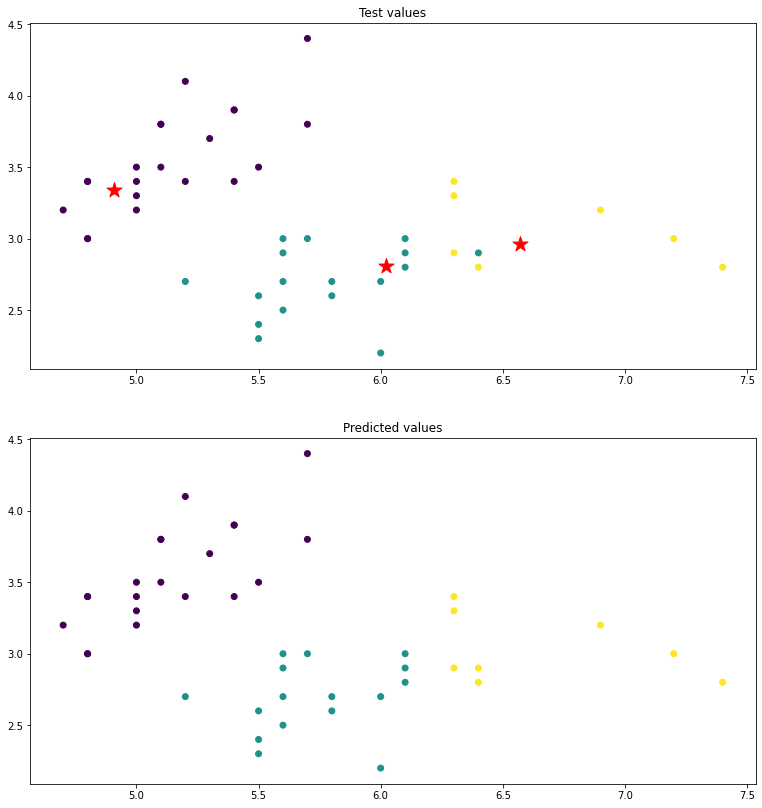

In [208]:
fig, axes = plt.subplots(2)
# разбиение тестовой выборки со значениями целевой переменной из исходного датасета (c центроидами) 
axes[0].scatter(x_test['sepal_length'], x_test['sepal_width'], c=y_test)
axes[0].scatter(lda.means_[:, 0], lda.means_[:, 1],  c='r', s=250, marker='*')
axes[0].set_title('Test values')
# разбиение тестовой выборки с предсказанными значениями целевой переменной
axes[1].scatter(x_test['sepal_length'], x_test['sepal_width'], c=y_pred)
axes[1].set_title('Predicted values')
fig.set_figwidth(13)   
fig.set_figheight(14)    

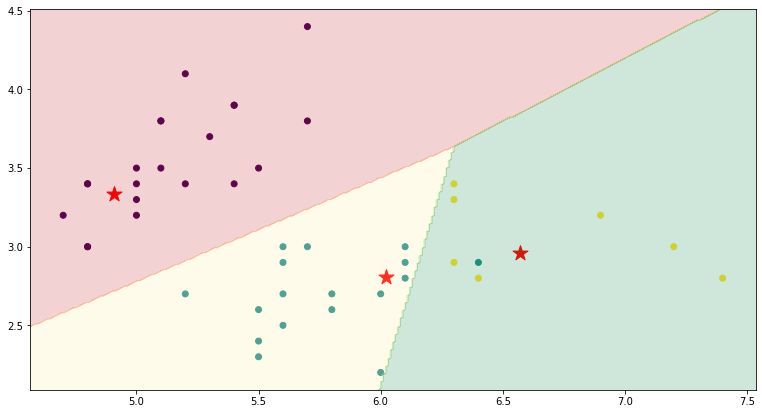

In [206]:

plt.scatter(x_test['sepal_length'], x_test['sepal_width'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1],  c='r', s=250, marker='*')

nx, ny = 300, 300
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.2)


# можно добавить на график еще и области. Привожу ссылку на статью, которой воспользовалась вместе с кодом с занятия.
# Интересно, что в самом конце как раз разбирается пример для датасета про ирис и визуализацию 3х классов 
# https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

### Перейдем к задаче кластеризации

Text(0, 0.5, 'Sepal width')

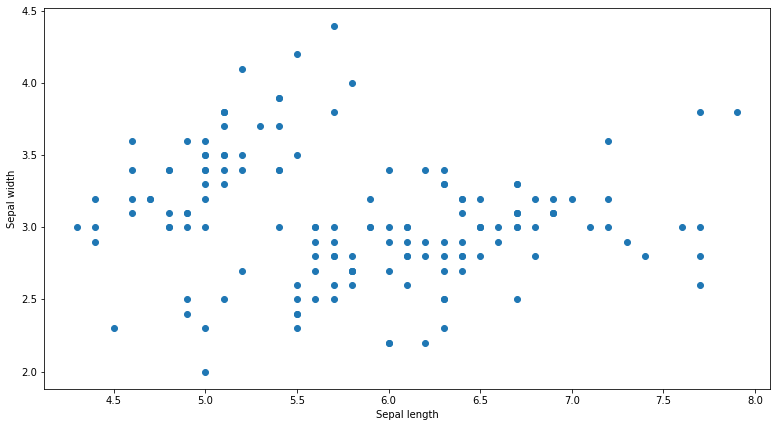

In [220]:
# посмотрим на наши данные
plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Из описания датасета мы знаем, что рассматриваются 3 вида ирисов, т.е. по идее должно быть 3 кластера. Но глядя на график, сложно сказать, что требуются именно 3 кластера. Интуитивно скорее хочется предположить, что здесь 2 крупные группы.

In [195]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Text(0, 0.5, 'Sepal width')

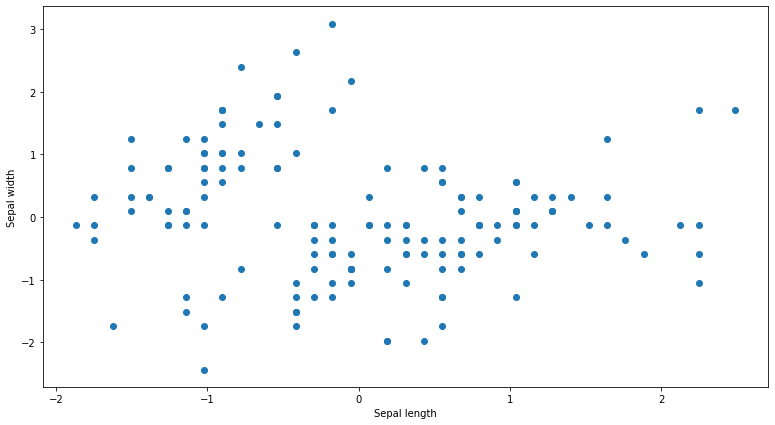

In [221]:
# посмотрим на нормализованные данные
# взаимное расположение точек, похоже, не изменилось, изменился только масштаб 
plt.scatter(df_scaled[:, 0], df_scaled[:, 1])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Построим график локтя и посмотрим, поможет ли он определится с количеством кластеров

In [199]:
from sklearn.cluster import KMeans

C:\Users\Polina.DESKTOP-UGBOPLJ\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


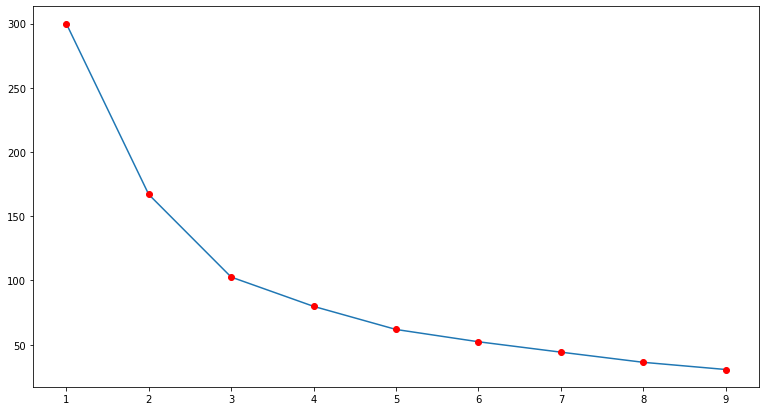

In [205]:
# строим график локтя

k_inertia = []
# задаем диапазон кластеров
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Нет очень явного перегиба в какой-либо из точек. В качестве переходной точки хочется взять k=3, все же там наблюдается заметное качественное изменение графика. При k=4 и больше график ведет себя почти как линия, перегибы в точках незаметны или плохо заметны.  
Построим модель с 3мя кластерами

Text(0.5, 1.0, 'K-means clustering')

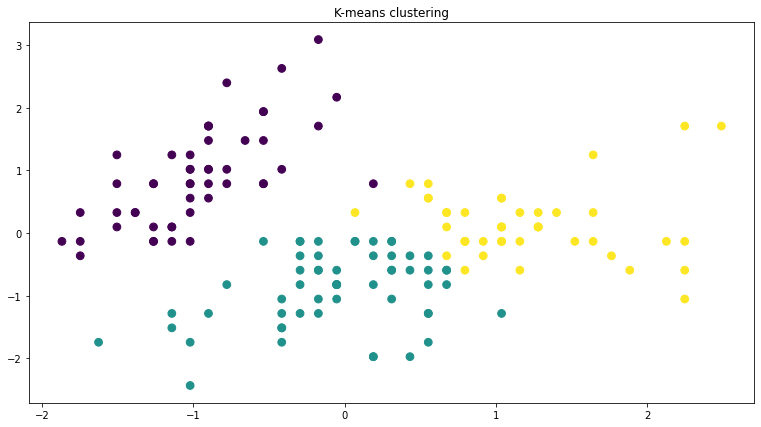

In [251]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df_scaled)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], cmap='viridis', c=clusters, s=60)
plt.title('K-means clustering')

Text(0.5, 1.0, 'Original groups')

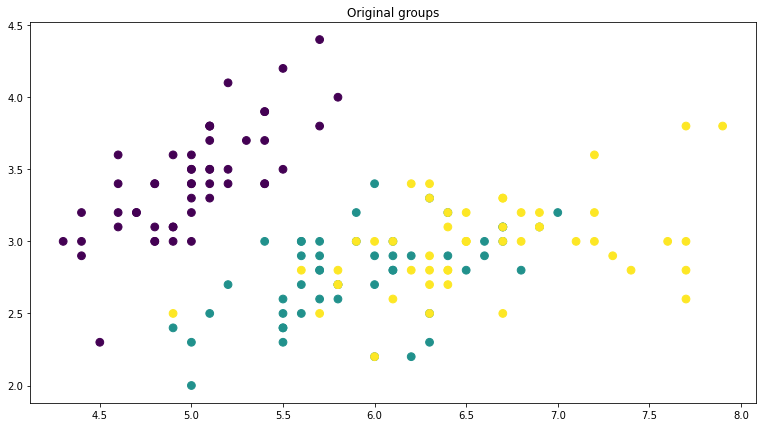

In [248]:
# для сравнения построим визулизацию разбиения на группы исходных данных
df_full = pd.concat([df, pd.Series(iris_class)], axis=1)
df_full.columns = ['sepal_length', 'sepal_width', 'iris_class']
plt.scatter(df_full['sepal_length'], df_full['sepal_width'], c=df_full['iris_class'],  s=60)
plt.title('Original groups')

Получили, что 1 кластер (фиолетовый) определен алгоритмом k-means достаточно хорошо по сравнению с исходными данными. Зеленый и желтый кластеры исходного датасета накладываются друг на друга, по нашим признакам проблематично провести границу между ними, поэтому 2й и 3й кластеры, определенные k-means, содержат ошибочные экземпляры. Но в целом получившееся разбиение выглядит достаточно логичным.

Для сравнения можно построить визуализации для 4х и 2х кластеров

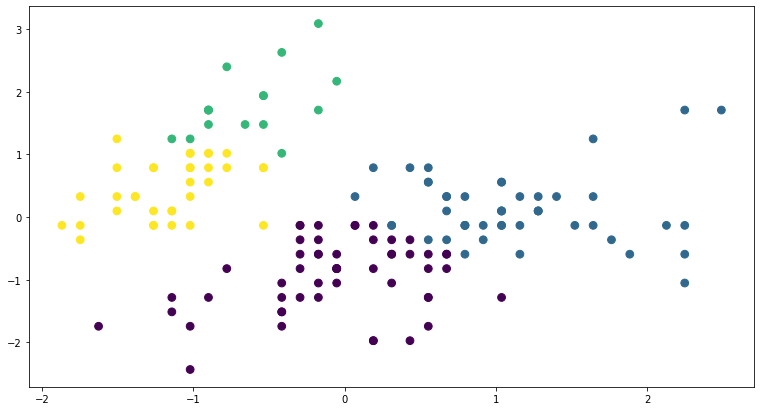

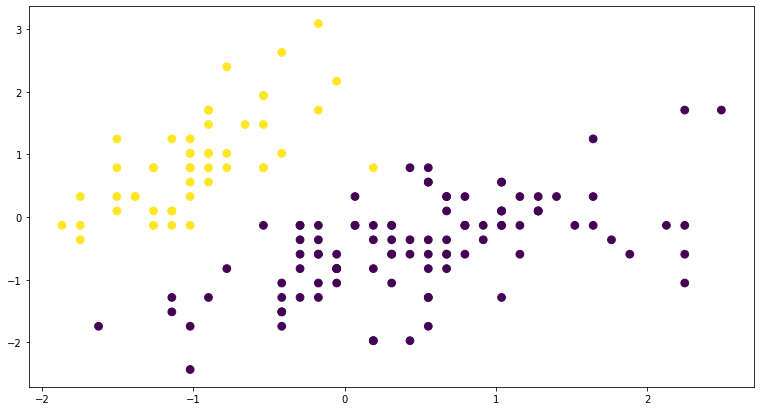

In [240]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(df_scaled)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], cmap='viridis', c=clusters, s=60)
plt.show()

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(df_scaled)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], cmap='viridis', c=clusters, s=60)

Деление на 4 кластера в рамках наших признаков проинтерпретировать сложнее. Более оптимальным будет вариант с делением на 3 кластера, более понятные группы.

Визуализация с 2мя кластерами выглядит достаточно естественной, такое деление можно было предположить исходя из простого предположения на основе визуализации исходных данных. Однако по условиям задачи есть 3 вида цветков, было бы нелогичным делать количество кластеров меньшим, чем известное количество видов. 